Plotting Pareto Fronts...
____________________________________________________________


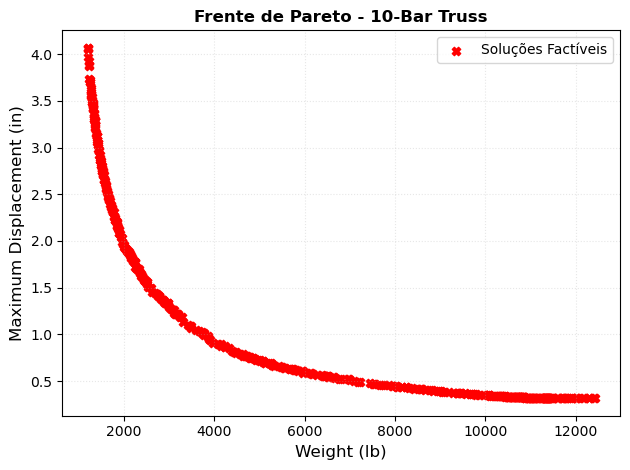


10-Bar Truss Results:
Total solutions: 456
Feasible solutions: 456
Infeasible solutions: 0

Feasible Solutions Range:
  Weight: 1203.79 to 12418.10 lb
  Displacement: 0.315756 to 4.068770 in

Best Solutions:
  Minimum weight: 1203.79 lb (displacement: 4.068770 in)
  Minimum displacement: 0.315756 in (weight: 12409.00 lb)
____________________________________________________________
Error creating plot for pareto_front_25bar_SaDE.csv: [Errno 2] No such file or directory: 'pareto_front_25bar_SaDE.csv'
Error creating plot for pareto_front_60bar_SaDE.csv: [Errno 2] No such file or directory: 'pareto_front_60bar_SaDE.csv'
Error creating plot for pareto_front_72bar_SaDE.csv: [Errno 2] No such file or directory: 'pareto_front_72bar_SaDE.csv'


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_pareto_front(filename, title):
    try:
        # Read results
        df = pd.read_csv(filename)
        
        if len(df) == 0:
            print(f"No solutions found in {filename}")
            return
            
        # Separate feasible and infeasible solutions
        feasible = df[df['feasible'] == True]
        infeasible = df[df['feasible'] == False]
        
        # Create plot
        # plt.figure(figsize=(10, 6))
        
        if len(infeasible) == 0:
            # Sort feasible solutions by weight for better visualization
            feasible_sorted = feasible.sort_values('weight')
            plt.scatter(feasible_sorted['weight'], feasible_sorted['max_displacement'], 
                       marker='X', c='red', label='Soluções Factíveis')
        
        # if len(infeasible) > 0:
        #     plt.scatter(infeasible['weight'], infeasible['max_displacement'], 
        #                c='red', s=40, alpha=0.6, label='Inviáveis', marker='x')
        
        plt.xlabel('Weight (lb)', fontsize=12)
        plt.ylabel('Maximum Displacement (in)', fontsize=12)
        plt.title(f'Frente de Pareto - {title}', fontsize=12, fontweight='bold')
        plt.legend(fontsize=10)
        plt.grid(True, ls=':', alpha=0.3)
        plt.tight_layout()
        
        # # Save the plot
        # plot_filename = filename.replace('.csv', '_plot.png')
        # plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
        plt.show()
        
        # Print statistics
        print(f"\n{title} Results:")
        print(f"Total solutions: {len(df)}")
        print(f"Feasible solutions: {len(feasible)}")
        print(f"Infeasible solutions: {len(infeasible)}")
        
        if len(feasible) > 0:
            print(f"\nFeasible Solutions Range:")
            print(f"  Weight: {feasible['weight'].min():.2f} to {feasible['weight'].max():.2f} lb")
            print(f"  Displacement: {feasible['max_displacement'].min():.6f} to {feasible['max_displacement'].max():.6f} in")
            
            # Print best solutions
            min_weight_sol = feasible.loc[feasible['weight'].idxmin()]
            min_disp_sol = feasible.loc[feasible['max_displacement'].idxmin()]
            
            print(f"\nBest Solutions:")
            print(f"  Minimum weight: {min_weight_sol['weight']:.2f} lb (displacement: {min_weight_sol['max_displacement']:.6f} in)")
            print(f"  Minimum displacement: {min_disp_sol['max_displacement']:.6f} in (weight: {min_disp_sol['weight']:.2f} lb)")
        
        # print(f"Plot saved as: {plot_filename}")
        print("_" * 60)
        
    except Exception as e:
        print(f"Error creating plot for {filename}: {e}")


if __name__ == "__main__":
    print("Plotting Pareto Fronts...")
    print("_" * 60)
    
    # Define the files and titles
    files_and_titles = [
        ("pareto_front_10bar_SaDE.csv", "10-Bar Truss"),
        ("pareto_front_25bar_SaDE.csv", "25-Bar Truss"), 
        ("pareto_front_60bar_SaDE.csv", "60-Bar Truss"),
        ("pareto_front_72bar_SaDE.csv", "72-Bar Truss")
    ]
    
    # Plot individual Pareto fronts
    for filename, title in files_and_titles:
        plot_pareto_front(filename, title)